In [69]:
# -*- coding: utf-8 -*-
"""
Created on Wed May  7 11:38:36 2025

@author: Frej
"""

import numpy as np
import matplotlib.pyplot as plt
import sympy as sp
import scipy.integrate as integrate


    

class M:
    def __init__(self,Nc,eps,phi,wl,I,E0,res):
        self.T = Nc*2*np.pi/wl
        self.A0 = np.sqrt(I)/wl
        
        self.eps = eps
        self.wl = wl
        self.phi = phi
        self.E0 = E0
        
        #Fields and times
        self.ts = np.linspace(0,self.T,num=res)
        vector = np.asarray([self.ts*0,self.eps*np.sin(self.wl*self.ts+self.phi),np.cos(self.wl*self.ts+self.phi)])
        self.As = np.sin(np.pi*self.ts/self.T)**2*self.A0/((1+self.eps**2)**(1/2))*vector

    
    #Defining Exponential

    def get_As(self):
        return self.As
    def exp_integrand(self,k):
        return [1j * (1/2) * ((k+A) @ (k+A)) for A in self.As.T]   
    def exp_integral(self,k):
        exp_ys = self.exp_integrand(k)
        return np.e**(integrate.cumulative_trapezoid(exp_ys,self.ts,initial=0)-1j * self.E0*self.ts)
    #Defining Integral
    def integrands(self,k):
        return self.As * self.exp_integral(k)
    def integral(self,k):
        ys = self.integrands(k)
        return k @ integrate.cumulative_trapezoid(ys,self.ts,initial=0)

    
    #Defining multiplication with fourier transform
    def f_phi_0(self,k):
        k_mag = np.linalg.norm(k)
        return 2*2**(1/2)/np.pi*(1/(k_mag**2+1)**2)
    def Mk0(self,k):
        return 1j*self.f_phi_0(k)*self.integral(k)
    def Mk0_squared(self,k):
        Mk0_squared = np.real(np.vdot(self.Mk0(k),self.Mk0(k)))
        return Mk0_squared

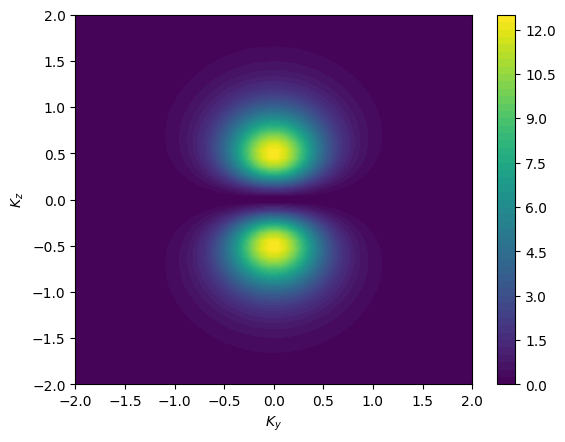

In [99]:

#Field parameters
Nc = 2 #Field revolutions in envelope
eps = 0 #(-1,0,1), Polarization of light
phi = np.pi /2 #Phase difference between envelope and field
#all values in au
wl = 0.057 #800nm wavelength
I = 0.001 #I=10^14 w/cm^2  
E0 = -0.500 #13.6 eV
res = 1000

M1 = M(Nc,eps,phi,wl,I,E0,res)

#Trial calculation for k along the z-axis

#kxs = np.linspace(-2,2,num=50)
kys = np.linspace(-2,2,num=50)
kzs = np.linspace(-2,2,num=50)

a = np.empty(shape=(len(kys),len(kzs)))
for j in range(0,len(kys)):
    for k in range(0,len(kzs)):
        a[k][j]=M1.Mk0_squared([0,kys[j],kzs[k]])
        #
        #print(a[k][j])

# Simple plot
plt.contourf(kys, kzs, a,50)
plt.xlabel(r'$K_y$')
plt.ylabel(r'$K_z$')
plt.colorbar()

In [71]:
kys = np.linspace(-2,2,num=50)
kzs = np.linspace(-2,2,num=50)

Nc_list = [10,20]
for Nc in Nc_list:
    M1 = M(Nc,eps,phi,wl,I,E0,res)
    a = np.empty(shape=(len(kys),len(kzs)))

    for j in range(0,len(kys)):
        for k in range(0,len(kzs)):
            a[k][j]=M1.Mk0_squared([0,kys[j],kzs[k]])
            #print(a[k][j])

    # Simple plot
    plt.contourf(kys, kzs, a,50)
    plt.xlabel(r'$K_y$')
    plt.ylabel(r'$K_z$')
    plt.colorbar()
    plt.title("$N_C$ = " + str(Nc))
    plt.savefig("/Users/klonk/Downloads/250513_Ultra_Plots/name" + str(Nc))
    plt.clf()

KeyboardInterrupt: 

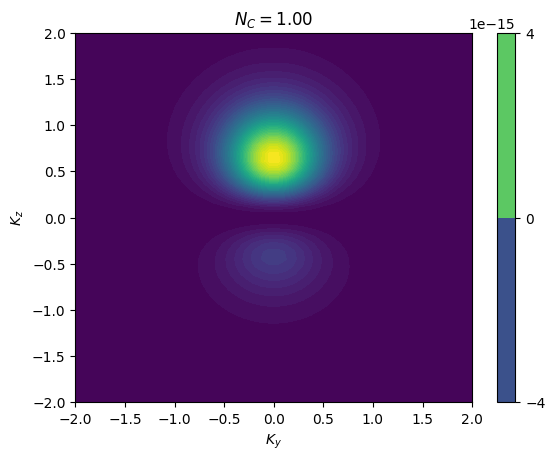

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.animation import FuncAnimation, PillowWriter

# Define grid
kys = np.linspace(-2, 2, num=50)
kzs = np.linspace(-2, 2, num=50)
KYY, KZZ = np.meshgrid(kys, kzs)

# List of Nc values
Nc_list = np.linspace(1, 3, 3)

# Prepare figure
fig, ax = plt.subplots()
contour = ax.contourf(KYY, KZZ, np.zeros_like(KYY), levels=50)
cbar = plt.colorbar(contour)
ax.set_xlabel(r'$K_y$')
ax.set_ylabel(r'$K_z$')
title = ax.set_title("")

# Function to update frame
def update(frame):
    Nc = Nc_list[frame]
    M1 = M(Nc, eps, phi, wl, I, E0, res)  
    for j in range(len(kys)):
        for k in range(len(kzs)):
            a[k, j] = M1.Mk0_squared([0, kys[j], kzs[k]])

    ax.clear()
    contour = ax.contourf(KYY, KZZ, a, levels=50)
    ax.set_xlabel(r'$K_y$')
    ax.set_ylabel(r'$K_z$')
    ax.set_title(r"$N_C = $" + f"{Nc:.2f}")
    return contour.collections

# Create animation
anim = FuncAnimation(fig, update, frames=len(Nc_list), blit=False)

# Save to gif
anim.save("contour_animation.gif", writer=PillowWriter(fps=2))


In [ ]:
a.shape

(50, 50)

## compare A and slice of k

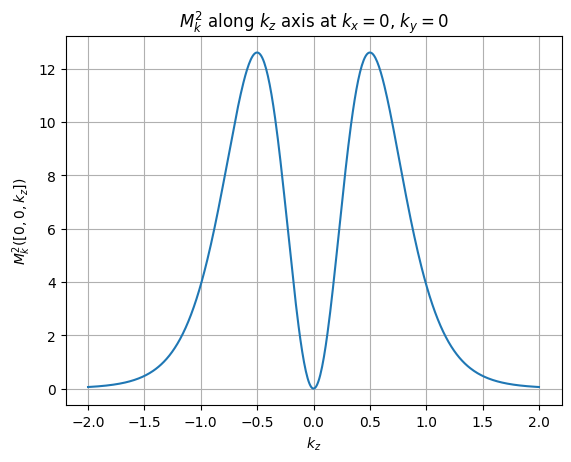

In [100]:
kzs = np.linspace(-2, 2, num=500)

# Allocate result array
a = np.empty_like(kzs)

# Compute Mk0_squared for each kz at kx = 0, ky = 0
for i, kz in enumerate(kzs):
    a[i] = M1.Mk0_squared([0, 0, kz])

# Plot
plt.plot(kzs, a)
plt.xlabel(r'$k_z$')
plt.ylabel(r'$M_k^2([0, 0, k_z])$')
plt.title(r'$M_k^2$ along $k_z$ axis at $k_x = 0$, $k_y = 0$')
plt.grid(True)
plt.show()


In [101]:
np.abs(kys)

array([2.        , 1.91836735, 1.83673469, 1.75510204, 1.67346939,
       1.59183673, 1.51020408, 1.42857143, 1.34693878, 1.26530612,
       1.18367347, 1.10204082, 1.02040816, 0.93877551, 0.85714286,
       0.7755102 , 0.69387755, 0.6122449 , 0.53061224, 0.44897959,
       0.36734694, 0.28571429, 0.20408163, 0.12244898, 0.04081633,
       0.04081633, 0.12244898, 0.20408163, 0.28571429, 0.36734694,
       0.44897959, 0.53061224, 0.6122449 , 0.69387755, 0.7755102 ,
       0.85714286, 0.93877551, 1.02040816, 1.10204082, 1.18367347,
       1.26530612, 1.34693878, 1.42857143, 1.51020408, 1.59183673,
       1.67346939, 1.75510204, 1.83673469, 1.91836735, 2.        ])

In [102]:
As = M1.get_As()

Text(0, 0.5, 'amplitude')

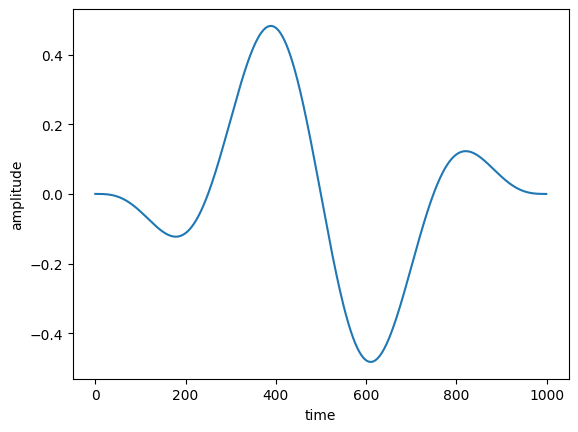

In [103]:
plt.plot(As[2,:])
plt.xlabel("time")
plt.ylabel("amplitude")

In [104]:
f_result.shape

(1000,)

In [85]:
f_result[2,:]

array([-9.18015663e-15+0.00000000e+00j, -1.51345315e-04-4.75466893e-07j,
       -6.71750072e-04-4.22078574e-06j, -1.80997623e-03-1.70591292e-05j,
       -4.20953654e-03-5.29013809e-05j, -9.60970620e-03-1.50961328e-04j,
       -2.35275607e-02-4.43536603e-04j, -6.91028682e-02-1.51989646e-03j,
       -3.14876789e-01-7.91538352e-03j, -1.18327999e+02-3.34653718e+00j,
        2.39855374e+02+7.53775879e+00j, -1.21902709e+02-4.21433296e+00j,
        4.90509276e-01+1.85005294e-02j,  1.31952958e-01+5.39205001e-03j,
        5.67866914e-02+2.49922087e-03j,  3.04638671e-02+1.43663951e-03j,
        1.86225487e-02+9.36860555e-04j,  1.24167480e-02+6.63773410e-04j,
        8.80837769e-03+4.98633639e-04j,  6.54563617e-03+3.91175414e-04j,
        5.04269230e-03+3.17259308e-04j,  3.99814493e-03+2.64154753e-04j,
        3.24510295e-03+2.24643228e-04j,  2.68555827e-03+1.94387812e-04j,
        2.25911301e-03+1.70656618e-04j,  1.92701785e-03+1.51659594e-04j,
        1.66354891e-03+1.36184021e-04j,  1.45112073

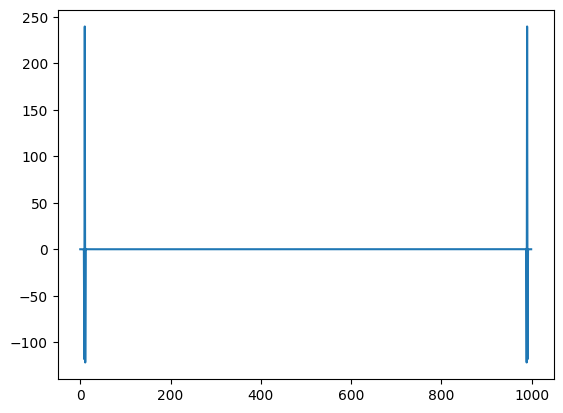

In [88]:
f_result = np.fft.fft(As[2,:])
plt.plot(f_result)


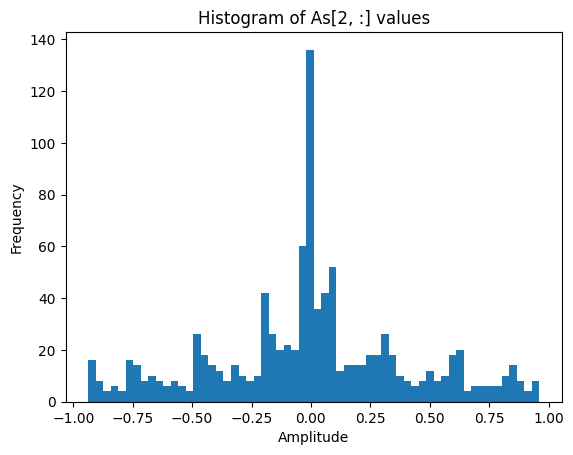

In [78]:
import matplotlib.pyplot as plt

plt.hist(As[2, :], bins=60)  # You can adjust the number of bins
plt.xlabel("Amplitude")
plt.ylabel("Frequency")
plt.title("Histogram of As[2, :] values")
plt.show()
